In [1]:
import pandas as pd
PATH = r"C:\\Users\\tengd\\OneDrive - The Hong Kong Polytechnic University\\Student Assistant\\ChinaDynam\\Data\\对比"

In [2]:
amap1 = pd.read_csv(PATH + r"\\Amap15_19.csv", encoding='utf-8')
amap2 = pd.read_csv(PATH + r"\\Amap20_25.csv", encoding='utf-8')

C:\Users\tengd\AppData\Local\Temp\ipykernel_45512\717832838.py:2: DtypeWarning: Columns (7,8,9,13,14,15,16,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  amap2 = pd.read_csv(PATH + r"\\Amap20_25.csv", encoding='utf-8')


In [3]:
# Compare the number of EVCS in each province
df = pd.concat([amap1[["pname", "year"]], amap2[["pname", "year"]]], ignore_index=True)
province = amap1["pname"].unique()
data = {p:[] for p in province}
for p in province:
    dfP = df.loc[df["pname"] == p]
    for y in range(2015, 2026):
        dfY = dfP.loc[dfP["year"] == y]
        data[p].append(len(dfY))
dataDf = pd.DataFrame(data, index=range(2015, 2026))
dataDf.drop(columns=["香港特别行政区", "澳门特别行政区", "台湾省", "台湾"], axis=1, inplace=True)
dataDf.to_csv(PATH + r"\\Amap_Province_EVCS.csv", encoding="ansi", index_label="year")

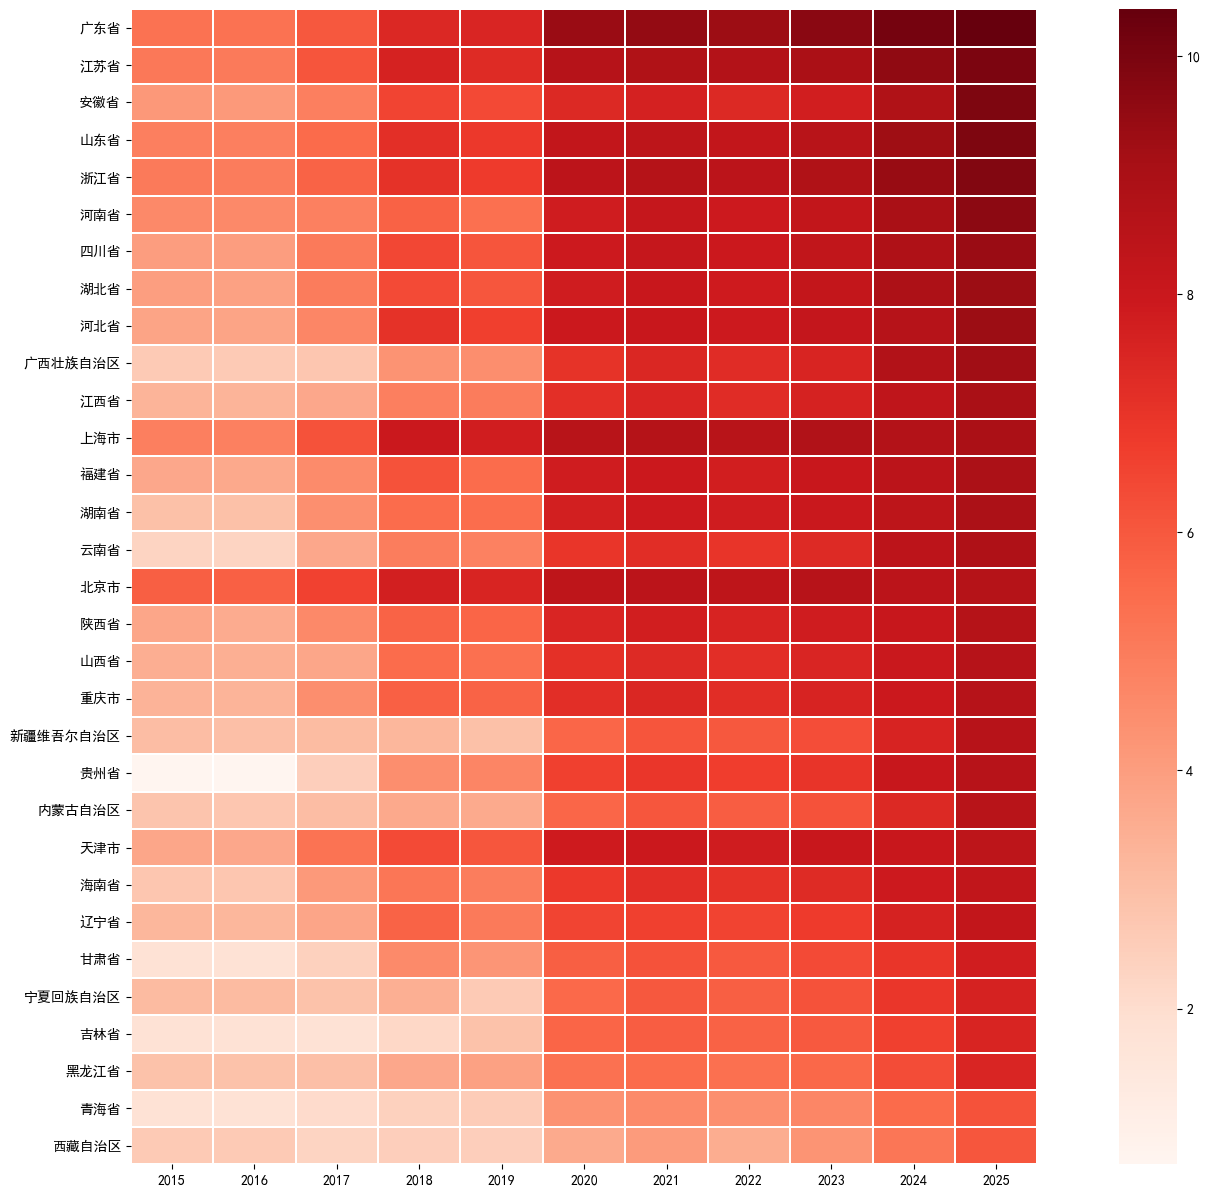

In [4]:
# Heat map
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams["font.sans-serif"] = ["SimHei"]

plt.figure(figsize=(15, 15))  # Set the figure size

dataPivot = dataDf.T.sort_values(by=2025, ascending=False)
dataPivot = np.log(dataPivot + 1)  # Apply log transformation for better visualization
heatmap = sns.heatmap(
    dataPivot,
    cmap="Reds",
    fmt='d',
    annot=False, cbar=True,
    linewidths=0.05, linecolor="white",
    cbar_kws={"pad": 0.07}, # gap between colorbar and heatmap
)